In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
import os
import cv2


In [10]:
os.getcwd()

'c:\\Zeeshan\\Vscode_projects\\mask'

In [11]:
img = cv2.imread('C:/Zeeshan/Vscode_projects/mask/Dataset/Face_mask/00000_Mask.jpg')

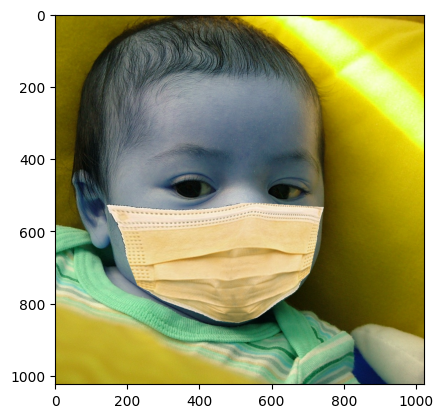

In [5]:
plt.imshow(img) ##BGR

In [6]:
img.shape

(1024, 1024, 3)

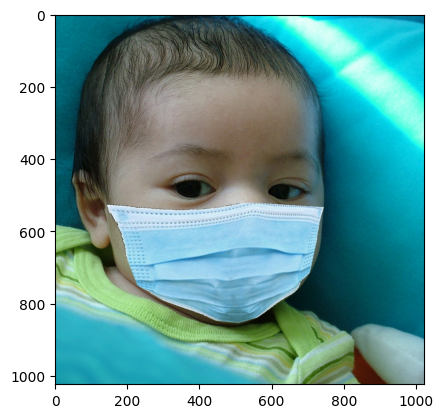

In [7]:
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#BGR to RGB format
plt.imshow(image)

In [8]:
image.shape

(1024, 1024, 3)

In [14]:
#Convert image to RGB format and reduce the size to 224*224*3 
Directory ='Dataset/'
classes = ['Face_mask','No_mask']
training = []
img_size =224
def training_data():
    for category in classes:
        path = os.path.join(Directory,category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path,img)
                img = cv2.imread(img_path)
                img_array = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img_update = cv2.resize(img_array,(img_size,img_size))
                label = classes.index(category)
                training.append([img_update,label])
            except Exception as e:
                pass

In [15]:
training_data()

In [16]:
len(training)

1950

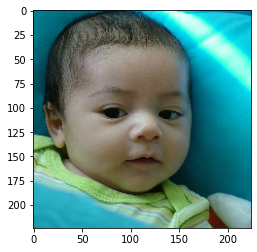

In [17]:
plt.imshow(training[950][0])

In [18]:
training[0][0].shape

(224, 224, 3)

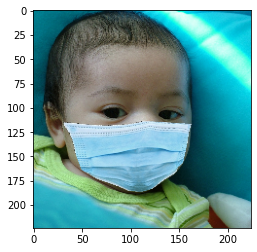

In [19]:
plt.imshow(training[0][0])

In [20]:
import random
random.shuffle(training)

In [21]:
X=[]
y=[]
for feature , label in training:
    X.append(feature)
    y.append(label)
    

In [22]:
type(X)

list

In [23]:
type(y)

list

In [24]:
img_size = 224
X = np.array(X).reshape(-1,img_size,img_size,3)

In [25]:
X.shape

(1950, 224, 224, 3)

In [26]:
#Normalizing the data
X = X/255.0 

In [27]:
X

array([[[[0.44313725, 0.33333333, 0.27843137],
         [0.43529412, 0.32941176, 0.2627451 ],
         [0.44313725, 0.33333333, 0.27843137],
         ...,
         [0.47843137, 0.4       , 0.35686275],
         [0.47843137, 0.40392157, 0.36078431],
         [0.4745098 , 0.40392157, 0.35686275]],

        [[0.43921569, 0.33333333, 0.26666667],
         [0.43921569, 0.34117647, 0.2745098 ],
         [0.44705882, 0.34509804, 0.27843137],
         ...,
         [0.47843137, 0.4       , 0.35686275],
         [0.4745098 , 0.4       , 0.35686275],
         [0.4745098 , 0.39607843, 0.34901961]],

        [[0.43137255, 0.32156863, 0.26666667],
         [0.43137255, 0.3254902 , 0.25882353],
         [0.43921569, 0.33333333, 0.27843137],
         ...,
         [0.45882353, 0.38039216, 0.3372549 ],
         [0.48627451, 0.40784314, 0.36470588],
         [0.47058824, 0.39607843, 0.34117647]],

        ...,

        [[0.63921569, 0.20392157, 0.1254902 ],
         [0.60784314, 0.16862745, 0.09019608]

In [28]:
Y = np.array(y)

In [29]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
#pickling the dataset
import pickle
with open('X.pickle','wb') as f:
    pickle.dump(X,f)


with open('Y.pickle','wb') as f:
    pickle.dump(Y,f)

In [7]:
#Using the pickle dataset
import pickle
with open('X.pickle','rb') as f:
    X = pickle.load(f)
    
with open('Y.pickle','rb') as f:
    y = pickle.load(f)

In [8]:
len(X)

1950

In [9]:
len(y)

1950

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
X_train.shape

(1560, 224, 224, 3)

In [214]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [12]:
X_test.shape

(390, 224, 224, 3)

In [13]:
y_test.shape

(390,)

In [14]:
y_train.shape

(1560,)

# Deep learning model for training

In [15]:
from keras.applications.vgg16 import VGG16

In [16]:
vgg = VGG16()

In [17]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
from keras import Sequential

In [19]:
model = Sequential()

In [20]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [22]:
for layer in model.layers:
    layer.trainable = False

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [24]:
from keras.layers import Dense

In [25]:
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [27]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [192]:
model.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Epoch 1/3
49/49 [==============================] - 242s 5s/step - loss: 0.1755 - accuracy: 0.9712 - val_loss: 0.1701 - val_accuracy: 0.9718
Epoch 2/3
49/49 [==============================] - 231s 5s/step - loss: 0.1356 - accuracy: 0.9776 - val_loss: 0.1266 - val_accuracy: 0.9872
Epoch 3/3
49/49 [==============================] - 228s 5s/step - loss: 0.1094 - accuracy: 0.9795 - val_loss: 0.1026 - val_accuracy: 0.9897


In [193]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [238]:
def predict(pred):
    if pred.item() <= 0.5:
        return "mask"
    else:
        return 'No mask'

In [251]:
# with mask
import cv2
import numpy as np
virat_img = cv2.imread('00012_Mask.jpg')
img1 = cv2.cvtColor(virat_img,cv2.COLOR_BGR2RGB)
final_img = cv2.resize(img1,(224,224))
#need to add one more dimension
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img/255.0
predictions = model.predict(final_img)
# predictions = (predictions >= 0.5)


1/1 [==============================] - 0s 160ms/step


In [252]:
predictions

array([[0.05175295]], dtype=float32)

In [253]:
predict(predictions)

'mask'

In [267]:
# without mask
import cv2
import numpy as np
virat_img = cv2.imread('virat.jpg')
img1 = cv2.cvtColor(virat_img,cv2.COLOR_BGR2RGB)
final_img = cv2.resize(img1,(224,224))
#need to add one more dimension
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img/255.0
predictions = model.predict(final_img)
# predictions = (predictions >= 0.5)

1/1 [==============================] - 0s 167ms/step


In [268]:
predictions

array([[0.87494123]], dtype=float32)

In [269]:
predict(predictions)

'No mask'

In [270]:
model.save('modelvvg16.h5')

In [2]:
model = tf.keras.models.load_model('modelvvg16.h5')

# Fask Mask Detection demo

In [25]:
# with mask
import cv2
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey: ey+eh , ex: ex+ew]
        color_img = cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB)
        final_image = cv2.resize(color_img,(224,224))
        final_image = np.expand_dims(final_image,axis=0) #need fourth dimension
        final_image = final_image/255.0
        pred = model.predict(final_image)
        
        if pred.item() > 0.80:
            status = f'No Mask with probability of {pred.item()}'
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(frame,status,(x,y-20),5,cv2.FONT_HERSHEY_PLAIN,(255,255,0),1)
        else:
            status = f'Mask with probability of {pred.item()}'
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(frame,status,(x,y-20),5,cv2.FONT_HERSHEY_PLAIN,(255,255,0),1)

        
    cv2.imshow('Face mask',frame)
    key = cv2.waitKey(60)
    if key ==13:
        break
        


cap.release()
cv2.destroyAllWindows()
        

1/1 [==============================] - 0s 162ms/step


In [79]:
predictions

array([[0.07105003]], dtype=float32)

In [83]:
pred

'mask'

In [132]:
final_image

array([[[[0.62352941, 0.80784314, 0.85490196],
         [0.62352941, 0.8       , 0.85882353],
         [0.63137255, 0.8       , 0.85098039],
         ...,
         [0.64705882, 0.81960784, 0.85098039],
         [0.65490196, 0.82745098, 0.85882353],
         [0.65490196, 0.82745098, 0.85882353]],

        [[0.62745098, 0.80784314, 0.85882353],
         [0.63137255, 0.80392157, 0.85490196],
         [0.63921569, 0.79607843, 0.85098039],
         ...,
         [0.64705882, 0.81960784, 0.85098039],
         [0.65098039, 0.82352941, 0.85490196],
         [0.65490196, 0.82745098, 0.85882353]],

        [[0.62745098, 0.80392157, 0.85098039],
         [0.63529412, 0.80392157, 0.85490196],
         [0.64313725, 0.79215686, 0.85098039],
         ...,
         [0.64705882, 0.81960784, 0.85098039],
         [0.64705882, 0.81960784, 0.85098039],
         [0.64705882, 0.81960784, 0.85098039]],

        ...,

        [[0.00392157, 0.00392157, 0.00784314],
         [0.05882353, 0.05882353, 0.05882353]

In [133]:
model.predict(final_image)

1/1 [==============================] - 0s 149ms/step


array([[0.72226685]], dtype=float32)

In [19]:
frame = cv2.imread('00012_Mask.jpg')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh , ex: ex+ew]
            color_img = cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB)
            final_image = cv2.resize(color_img,(224,224))
            final_image = np.expand_dims(final_image,axis=0) #need fourth dimension
#             plt.imshow(final_image[0])
            pred = model.predict(final_image)

1/1 [==============================] - 0s 159ms/step


In [21]:
pred.item()

0.0014047634322196245

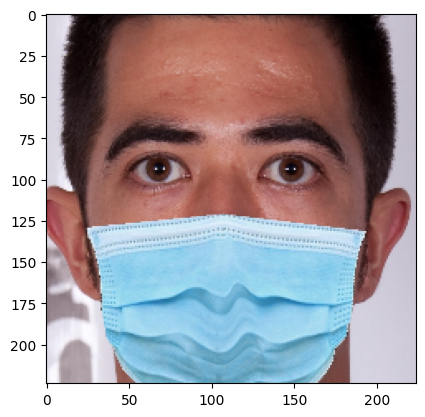

In [22]:
plt.imshow(final_image[0])

In [339]:
img = cv2.imread('virat.jpg')
img.shape
# resize_img = cv2.resize(img,(224,224))
# reshape = resize_img.reshape(-1,224,224,3)
# reshape = reshape/255.0


(234, 254, 3)

In [330]:
def detect(img):
    y_pred = model.predict(img)
    return y_pred[0][0]

In [331]:
detect(reshape)

1/1 [==============================] - 0s 138ms/step


0.95523363

In [353]:
def test(img):
    resize_img = cv2.resize(img,(224,224))
    reshape = resize_img.reshape(-1,224,224,3)
#     reshape = reshape/255.0
    y_pred = model.predict(reshape)
    return y_pred

In [355]:
l=[]
for i in range(0,len(X_test)):
    l.append(test(X_test[i]))

1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 140ms/step


In [356]:
len(X_test)

390

In [388]:
l

[array([[0.23983693]], dtype=float32),
 array([[0.91395867]], dtype=float32),
 array([[0.03697766]], dtype=float32),
 array([[0.02106548]], dtype=float32),
 array([[0.9892388]], dtype=float32),
 array([[0.9918809]], dtype=float32),
 array([[0.86423576]], dtype=float32),
 array([[0.18650885]], dtype=float32),
 array([[0.9765258]], dtype=float32),
 array([[0.984482]], dtype=float32),
 array([[0.9815129]], dtype=float32),
 array([[0.10458909]], dtype=float32),
 array([[0.06739604]], dtype=float32),
 array([[0.7625655]], dtype=float32),
 array([[0.15775119]], dtype=float32),
 array([[0.9475726]], dtype=float32),
 array([[0.01135953]], dtype=float32),
 array([[0.8757616]], dtype=float32),
 array([[0.9240122]], dtype=float32),
 array([[0.01420455]], dtype=float32),
 array([[0.89217883]], dtype=float32),
 array([[0.02248933]], dtype=float32),
 array([[0.9402076]], dtype=float32),
 array([[0.02616695]], dtype=float32),
 array([[0.31129098]], dtype=float32),
 array([[0.03534396]], dtype=float32

In [394]:
j=[]
for i in l:
    j.append(i[0][0])

In [395]:
j

[0.23983693,
 0.91395867,
 0.036977664,
 0.02106548,
 0.9892388,
 0.9918809,
 0.86423576,
 0.18650885,
 0.9765258,
 0.984482,
 0.9815129,
 0.10458909,
 0.06739604,
 0.7625655,
 0.15775119,
 0.9475726,
 0.011359529,
 0.8757616,
 0.9240122,
 0.014204548,
 0.89217883,
 0.022489328,
 0.9402076,
 0.026166948,
 0.31129098,
 0.035343964,
 0.07517885,
 0.16335268,
 0.09015331,
 0.01613073,
 0.03085089,
 0.89633584,
 0.031853266,
 0.020098962,
 0.032272007,
 0.044233643,
 0.9215504,
 0.17800201,
 0.028154043,
 0.8019665,
 0.65907925,
 0.7779578,
 0.21568702,
 0.027122114,
 0.033380922,
 0.16763988,
 0.97719455,
 0.9609118,
 0.011543715,
 0.9819597,
 0.025660971,
 0.8225,
 0.49332,
 0.5452167,
 0.8816005,
 0.96529,
 0.07937138,
 0.034931224,
 0.9862622,
 0.9264139,
 0.7971454,
 0.9488599,
 0.86786735,
 0.9845459,
 0.05469769,
 0.03664332,
 0.76798844,
 0.942981,
 0.8668428,
 0.18728183,
 0.10151363,
 0.059094176,
 0.96822923,
 0.015345262,
 0.9798469,
 0.15916012,
 0.11474571,
 0.88190705,
 0.05

In [406]:
df=pd.DataFrame({"y_pred":j,'y_test':y_test})

In [403]:
len(y_test)

390

In [399]:
len(y_test)

390

In [410]:
df.tail(200)

,y_pred,y_test
190,0.004409,0
191,0.960841,1
192,0.891948,1
193,0.026883,0
194,0.043601,0
...,...,...
385,0.944850,1
386,0.994957,1
387,0.893459,1
388,0.053338,0


In [24]:
img = cv2.imread('virat.jpg')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 =cv2.resize(img1,(224,224))
reshape = img2.reshape(-1,224,224,3) #fourth dimeansion
normal = reshape/255.0
predict = model.predict(normal)
predict

1/1 [==============================] - 0s 275ms/step


array([[0.87494123]], dtype=float32)